In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
from torch.nn.functional import softmax
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/drive/My Drive/DJIA Dataset/upload_DJIA_table.csv'

stock_data = pd.read_csv(file_path)

In [4]:
  stock_data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234


In [5]:
file_path1 = '/content/drive/My Drive/DJIA Dataset/RedditNews.csv'

reddit_data = pd.read_csv(file_path1)

In [6]:
reddit_data.head()

,Date,News
0,2016-07-01,A 117-year-old woman in Mexico City finally re...
1,2016-07-01,IMF chief backs Athens as permanent Olympic host
2,2016-07-01,"The president of France says if Brexit won, so..."
3,2016-07-01,British Man Who Must Give Police 24 Hours' Not...
4,2016-07-01,100+ Nobel laureates urge Greenpeace to stop o...


In [7]:
file_path2 = '/content/drive/My Drive/DJIA Dataset/Combined_News_DJIA.csv'

combined_data = pd.read_csv(file_path2)

In [8]:
combined_data.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

In [9]:
stock_data.isnull().sum()
reddit_data.isnull().sum()
combined_data.isnull().sum()

,0
Date,0
Label,0
Top1,0
Top2,0
Top3,0
Top4,0
Top5,0
Top6,0
Top7,0
Top8,0


In [10]:
stock_data.info()
reddit_data.info()
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1989 non-null   object 
 1   Open       1989 non-null   float64
 2   High       1989 non-null   float64
 3   Low        1989 non-null   float64
 4   Close      1989 non-null   float64
 5   Volume     1989 non-null   int64  
 6   Adj Close  1989 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 108.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73608 entries, 0 to 73607
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    73608 non-null  object
 1   News    73608 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 

In [11]:
# filled missing values by a blank space for text pre-processing
combined_data.fillna('', inplace=True)

In [12]:
combined_data.isnull().sum()

,0
Date,0
Label,0
Top1,0
Top2,0
Top3,0
Top4,0
Top5,0
Top6,0
Top7,0
Top8,0


In [13]:
# combining all the Top1 to Top25 news headlines of each day into one single string as FinBERT works best on one single large text/sentece
combined_data['combined_news'] = combined_data[[f'Top{i}' for i in range(1,26)]].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

In [14]:
# sorted data to follow ascending order as the other dataframes do
combined_data = combined_data.sort_values(by='Date', ascending=True).reset_index(drop=True)

In [15]:
combined_data.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,combined_news
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""","b""Georgia 'downs two Russian warplanes' as cou..."
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",b'Why wont America and Nato help us? If they w...
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",b'Remember that adorable 9-year-old who sang a...
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...,b' U.S. refuses Israel weapons to attack Iran:...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal 

In [16]:
print(stock_data['Date'].dtype)
print(reddit_data['Date'].dtype)
print(combined_data['Date'].dtype)

object
object
object


In [17]:
# changing to datetime format
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
reddit_data['Date'] = pd.to_datetime(reddit_data['Date'])
combined_data['Date'] = pd.to_datetime(combined_data['Date'])

In [18]:
print(stock_data['Date'].dtype)
print(reddit_data['Date'].dtype)
print(combined_data['Date'].dtype)

datetime64[ns]
datetime64[ns]
datetime64[ns]


In [19]:
print(stock_data['Date'].min(), stock_data['Date'].max())
print(reddit_data['Date'].min(), reddit_data['Date'].max())
print(combined_data['Date'].min(), combined_data['Date'].max())

2008-08-08 00:00:00 2016-07-01 00:00:00
2008-06-08 00:00:00 2016-07-01 00:00:00
2008-08-08 00:00:00 2016-07-01 00:00:00


In [20]:
# removed every sentence starting with letter 'b'
for i in range(1, 26):
    combined_data[f'Top{i}'] = combined_data[f'Top{i}'].apply(lambda x: x.replace("b'", "").replace("'", "") if isinstance(x, str) else x)

In [21]:
# removed spaces
combined_data = combined_data.applymap(lambda x: x.strip() if isinstance(x, str) else x)

<ipython-input-21-72922a461d81>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  combined_data = combined_data.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [22]:
# lowercasing text data
for i in range(1, 26):
    combined_data[f'Top{i}'] = combined_data[f'Top{i}'].str.lower()

In [23]:
combined_data.duplicated().sum()
reddit_data.duplicated().sum()
stock_data.duplicated().sum()
combined_data['Date'].duplicated().sum()

np.int64(0)

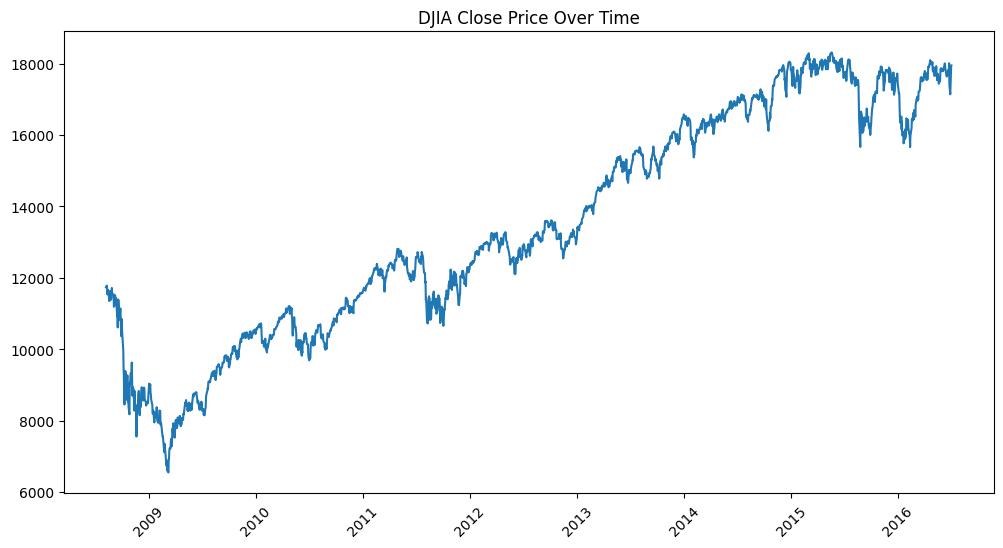

In [24]:
# Closing Price over time
plt.figure(figsize=(12,6))
plt.plot(stock_data['Date'], stock_data['Close'])
plt.title('DJIA Close Price Over Time')
plt.xticks(rotation=45)
plt.show()

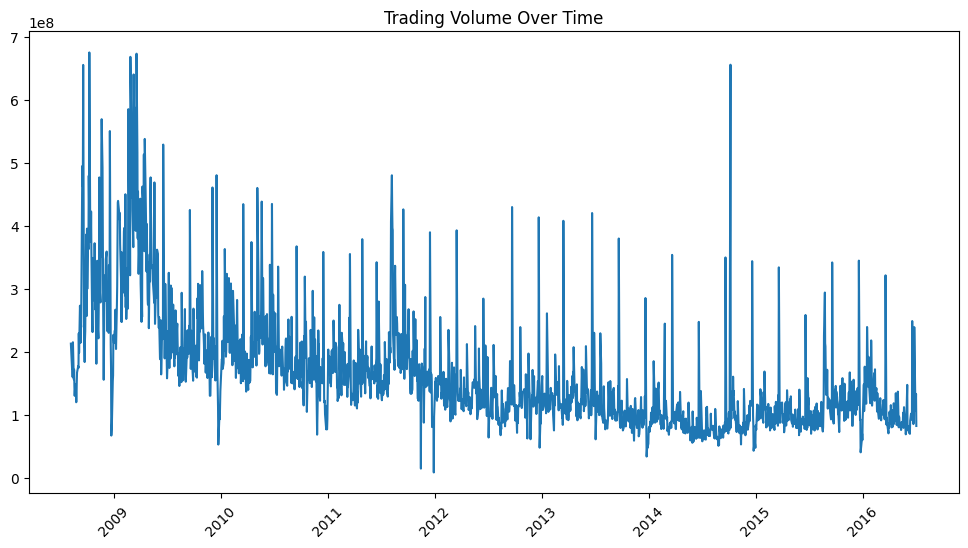

In [25]:
plt.figure(figsize=(12,6))
plt.plot(stock_data['Date'], stock_data['Volume'])
plt.title('Trading Volume Over Time')
plt.xticks(rotation=45)
plt.show()

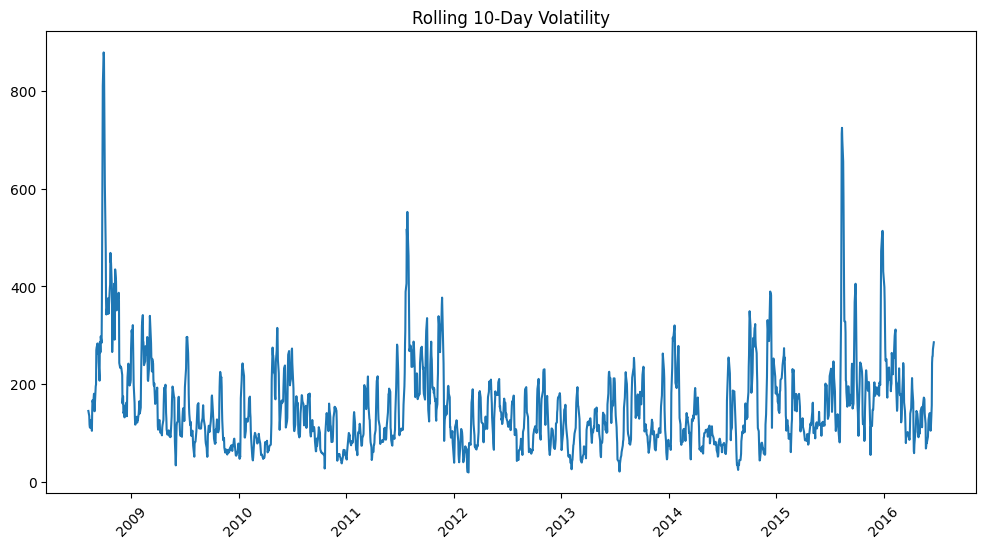

In [26]:
stock_data['Volatility'] = stock_data['Close'].rolling(window=10).std()

plt.figure(figsize=(12,6))
plt.plot(stock_data['Date'], stock_data['Volatility'])
plt.title('Rolling 10-Day Volatility')
plt.xticks(rotation=45)
plt.show()

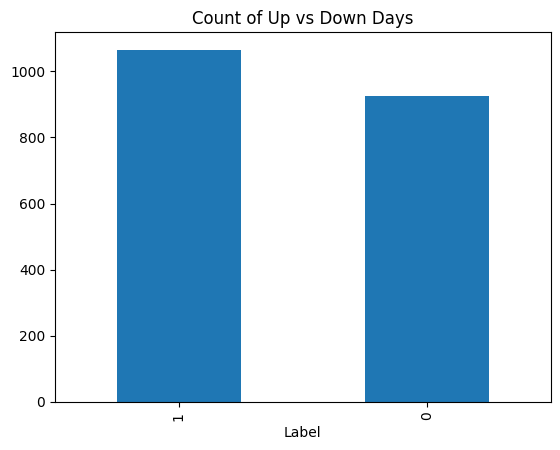

In [27]:
combined_data['Label'].value_counts().plot(kind='bar')
plt.title('Count of Up vs Down Days')
plt.show()

In [28]:
stock_features = stock_data[['Open', 'High', 'Low', 'Close', 'Volume']]

correlation_matrix = stock_features.corr()

print(correlation_matrix)

            Open      High       Low     Close    Volume
Open    1.000000  0.999592  0.999436  0.998991 -0.691621
High    0.999592  1.000000  0.999373  0.999546 -0.686997
Low     0.999436  0.999373  1.000000  0.999595 -0.699572
Close   0.998991  0.999546  0.999595  1.000000 -0.694281
Volume -0.691621 -0.686997 -0.699572 -0.694281  1.000000


In [29]:
stock_features = stock_data[['Open', 'High', 'Low', 'Close', 'Volume']]

covariance_matrix = stock_features.cov()

print(covariance_matrix)

                Open          High           Low         Close        Volume
Open    9.880219e+06  9.854163e+06  9.897074e+06  9.872527e+06 -2.041858e+11
High    9.854163e+06  9.836200e+06  9.874379e+06  9.855979e+06 -2.023682e+11
Low     9.897074e+06  9.874379e+06  9.925152e+06  9.900935e+06 -2.070022e+11
Close   9.872527e+06  9.855979e+06  9.900935e+06  9.884780e+06 -2.050184e+11
Volume -2.041858e+11 -2.023682e+11 -2.070022e+11 -2.050184e+11  8.821610e+15


In [30]:
!pip install transformers
!pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 98.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 83.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 79.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [31]:
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

In [32]:
!pip install huggingface_hub[hf_xet]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 MB 11.6 MB/s eta 0:00:00


In [33]:
def get_finbert_sentiment(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
        probs = softmax(outputs.logits, dim=1)
        if probs[0][1] > 0.6:
          sentiment = 'neutral'
        else:
          sentiment_score = probs[0][2] - probs[0][0]  # Positive - Negative
    return sentiment_score.item()

In [37]:
def smart_sentiment(text):
    score = get_finbert_sentiment(text)

    # Keyword adjustment
    negative_words = ['crash', 'fall', 'drop', 'down']
    positive_words = ['rise', 'gain', 'up', 'soar']

    text_lower = text.lower()

    if any(word in text_lower for word in negative_words):
        score -= 0.5  # penalize
    if any(word in text_lower for word in positive_words):
        score += 0.5  # boost

    # Clip score between -1 and 1
    score = max(min(score, 1), -1)

    return score

In [35]:
test_sentences = [
    "Massive bearish breakdown expected",
    "Tesla stock will fall badly",
    "Tesla stock will crash horribly"
]

In [38]:
for sentence in test_sentences:
    score = get_finbert_sentiment(sentence)
    print(f"Sentence: '{sentence}'")
    print(f"FinBERT Sentiment Score: {score}")
    print("-" * 60)

UnboundLocalError: cannot access local variable 'sentiment_score' where it is not associated with a value

In [ ]:
tqdm.pandas()

combined_data['news_sentiment'] = combined_data['combined_news'].progress_apply(get_finbert_sentiment)

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model = AutoModelForSequenceClassification.from_pretrained(
    "ProsusAI/finbert",
    torch_dtype=torch.float32  # Skipping safetensors to increase colab runtime efficiency by forcing pytorch model weights
)

In [ ]:
def get_finbert_sentiment(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
        probs = softmax(outputs.logits, dim=1)
        sentiment_score = probs[0][2] - probs[0][0]  # Positive - Negative
    return sentiment_score.item()

In [ ]:
tqdm.pandas()

reddit_data['reddit_sentiment'] = reddit_data['News'].progress_apply(get_finbert_sentiment)

In [ ]:
reddit_data[['Date', 'News', 'reddit_sentiment']].head()
combined_data[['Date', 'combined_news', 'news_sentiment']].head()

In [ ]:
merged_data = stock_data.merge(
    combined_data[['Date', 'news_sentiment', 'Label']],
    on='Date',
    how='inner'
)

merged_data = merged_data.merge(
    reddit_data.groupby('Date')['reddit_sentiment'].mean().reset_index(),
    on='Date',
    how='inner'
)

In [ ]:
merged_data['Target'] = (merged_data['Close'].shift(-1) > merged_data['Close']).astype(int)

In [ ]:
merged_data['Return'] = merged_data['Close'].pct_change()

In [ ]:
merged_data['total_sentiment'] = merged_data['news_sentiment'] + merged_data['reddit_sentiment']

In [ ]:
(merged_data['Target'] == merged_data['Label']).mean()

In [ ]:
merged_data.to_csv('multimodal_dataset_final.csv', index=False)

In [ ]:
drive.mount('/content/drive')

merged_data.to_csv('/content/drive/MyDrive/DJIA Dataset/multimodal_dataset_final.csv', index=False)